ASSIGNMENT 4 - HEART DISEASE CLASSIFICATION TREE

1.1 DATA CLEANING

✓ Dataset loaded successfully
  Original shape: (303, 14)

✓ Missing values removed
  New shape: (297, 14)
  Rows removed: 6

✓ Categorical variables converted to dummies
  New shape after dummy encoding: (297, 21)

✓ Binary target variable created
  Class distribution:
    No heart disease (y=0): 160 (53.9%)
    Has heart disease (y=1): 137 (46.1%)

1.2 DATA ANALYSIS

[1] Splitting data and plotting initial classification tree...
  Training set: 207 samples
  Test set: 90 samples


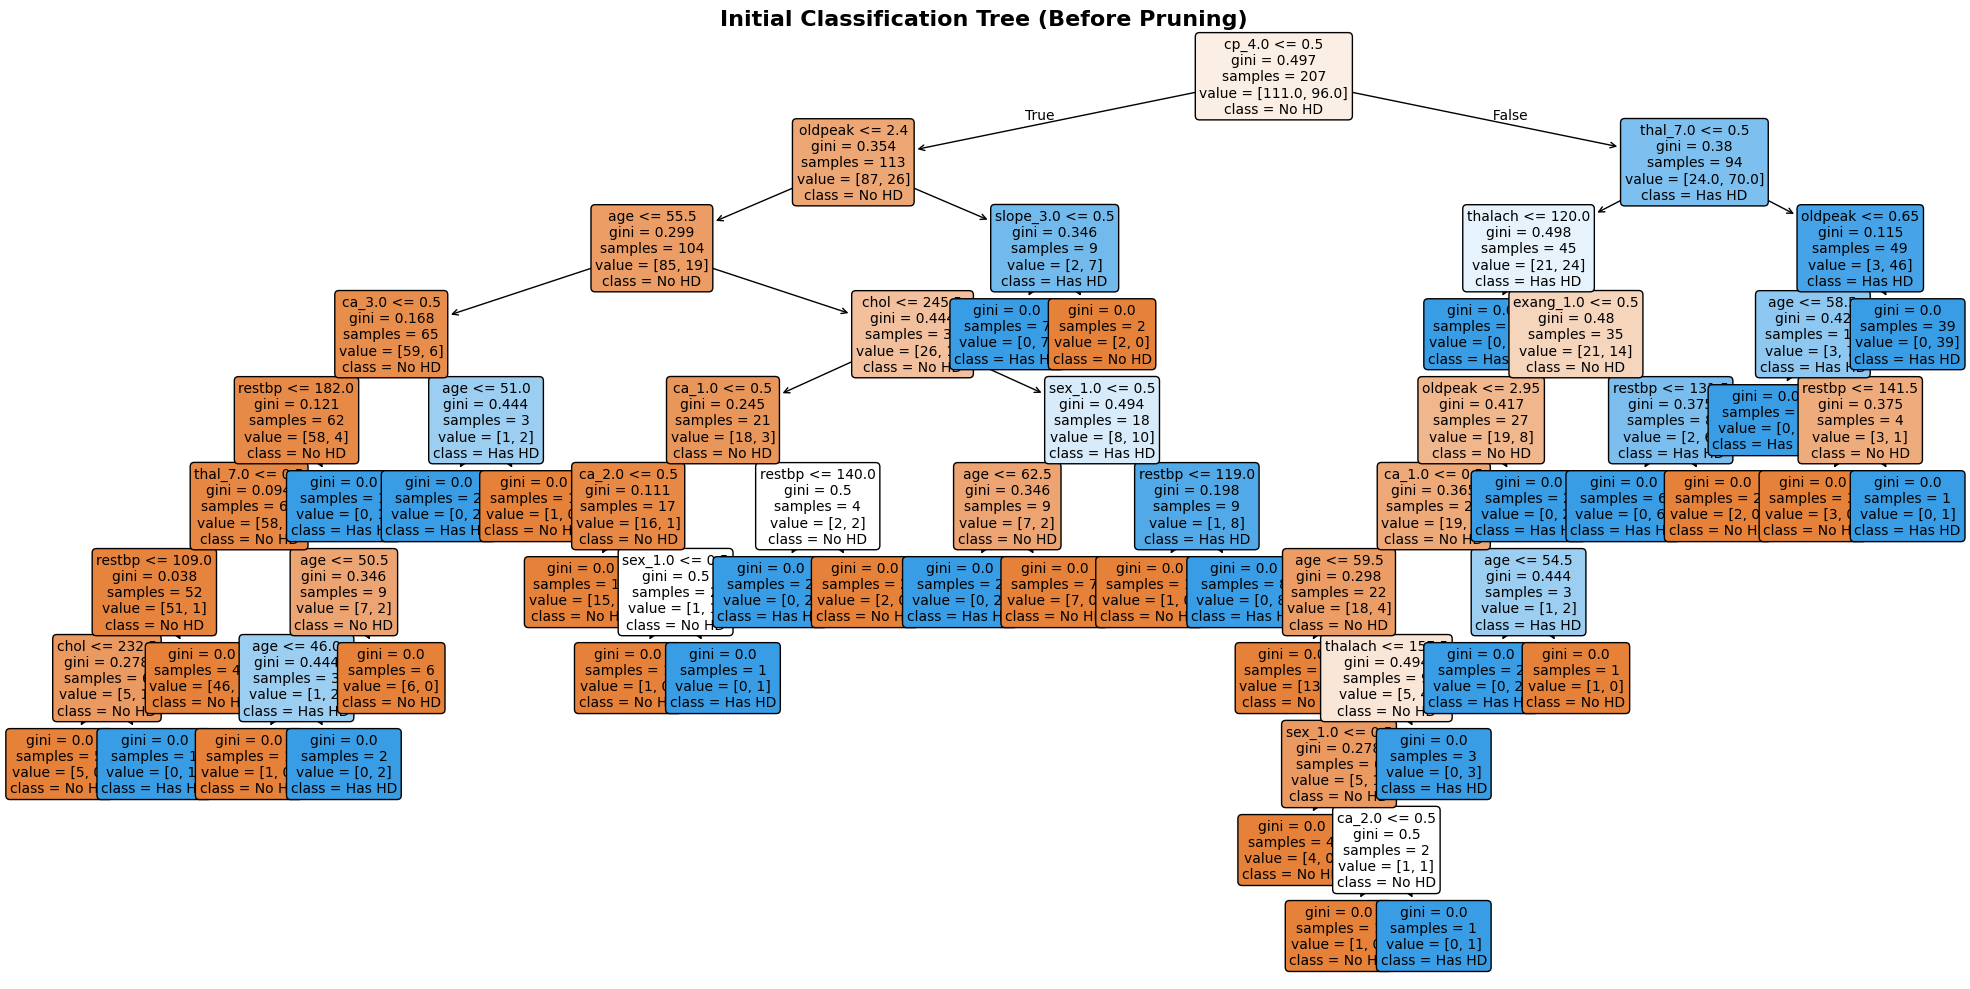

  ✓ Initial tree plotted and saved as 'initial_tree.png'

[2] Plotting confusion matrix for initial tree...


<Figure size 800x600 with 0 Axes>

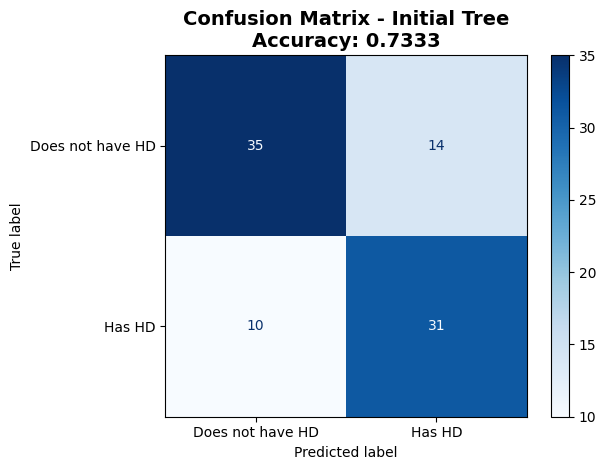

  ✓ Confusion matrix plotted and saved

  INTERPRETATION:
  - True Negatives (No HD correctly predicted): 35
  - False Positives (No HD incorrectly predicted as HD): 14
  - False Negatives (HD incorrectly predicted as No HD): 10
  - True Positives (HD correctly predicted): 31
  - Overall Accuracy: 0.7333

[3] Fixing overfitting using cross-validation...
  Generated 50 alpha values
  Range: 1.00e-10 to 0.0500

  ✓ Cross-validation completed
  Optimal alpha: 0.009747
  Best CV accuracy: 0.7544

[4] Plotting Inaccuracy Rate vs Alpha...


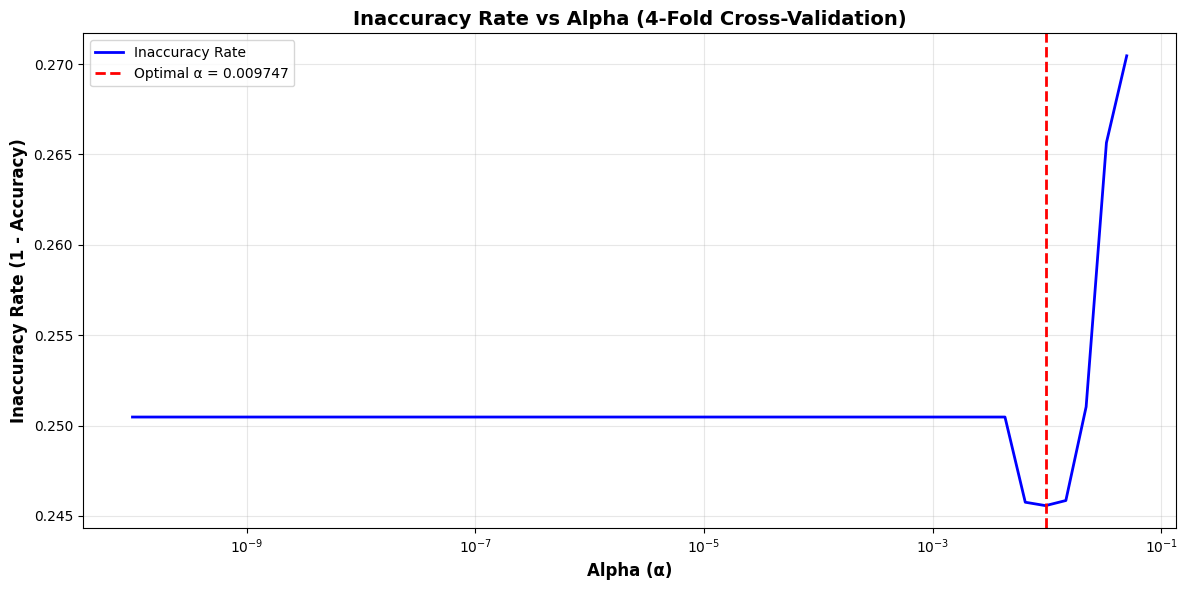

  ✓ Inaccuracy plot saved as 'inaccuracy_vs_alpha.png'

[5] Plotting pruned tree and confusion matrix with optimal alpha...


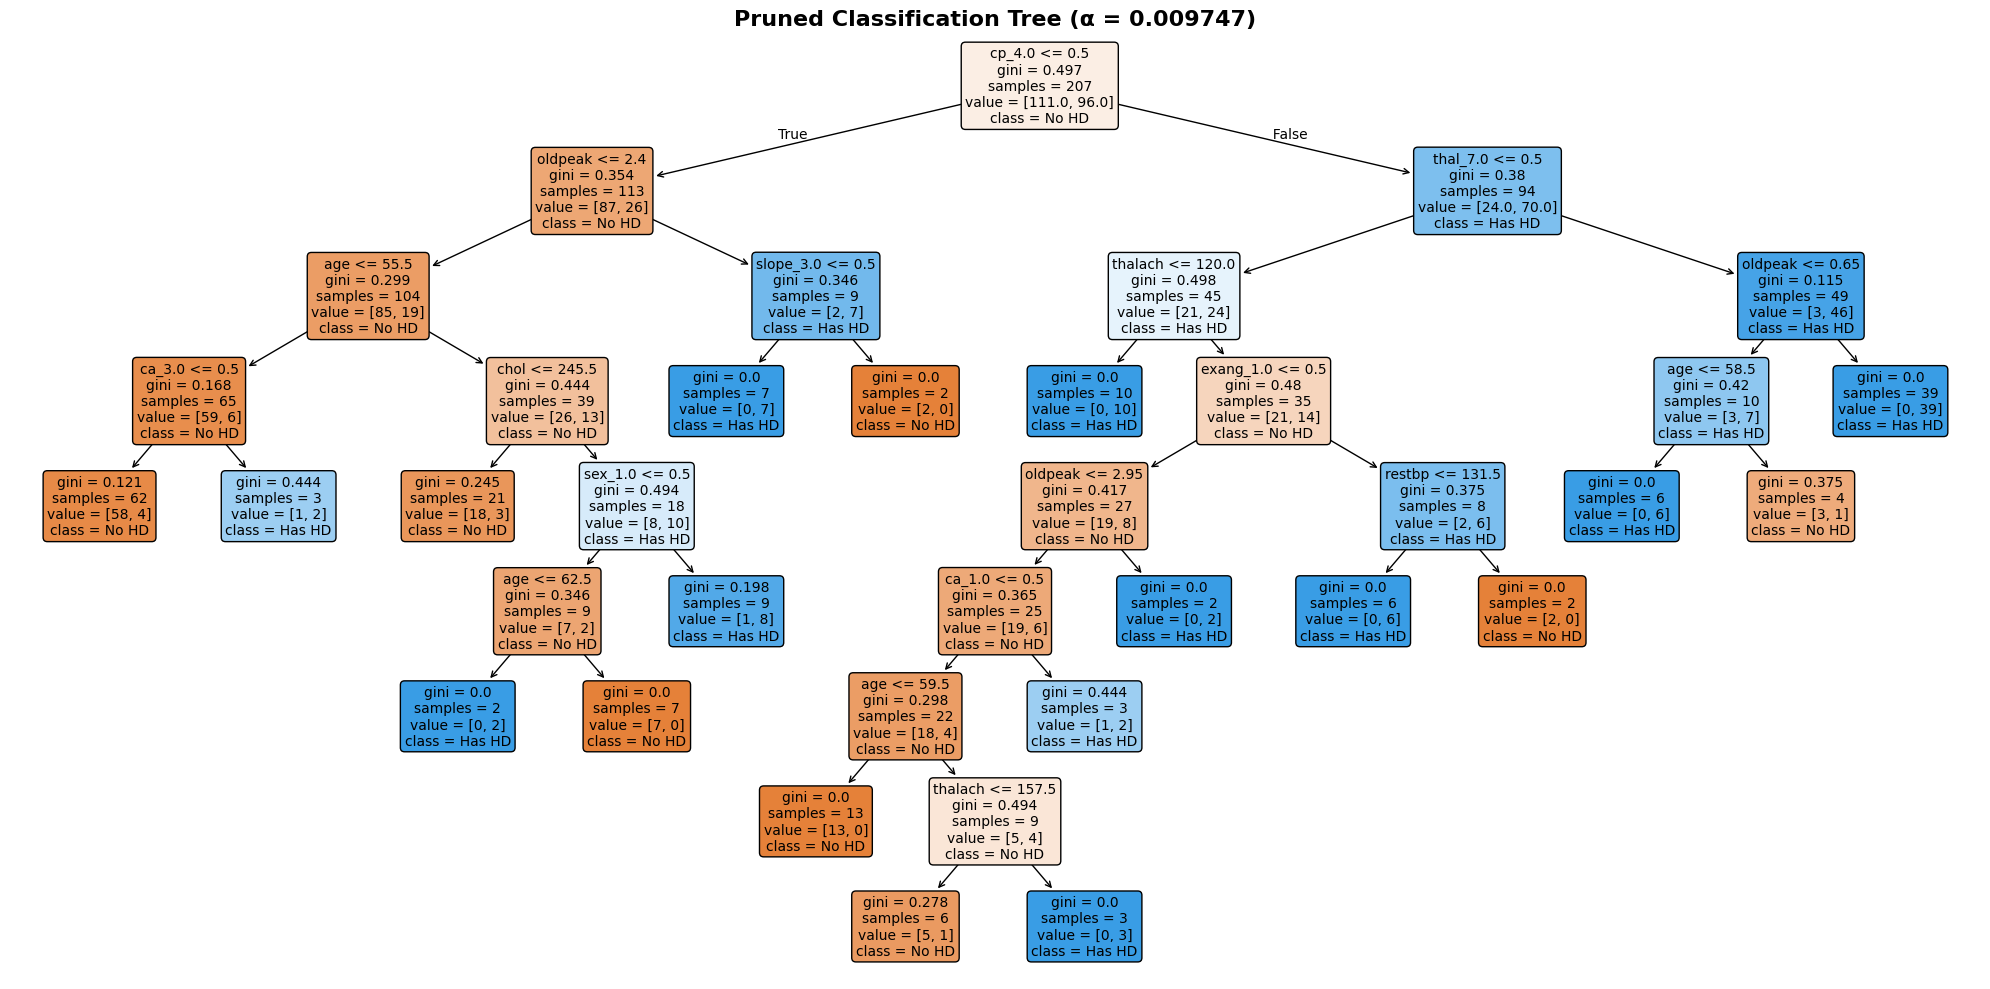

  ✓ Pruned tree plotted and saved as 'pruned_tree.png'


<Figure size 800x600 with 0 Axes>

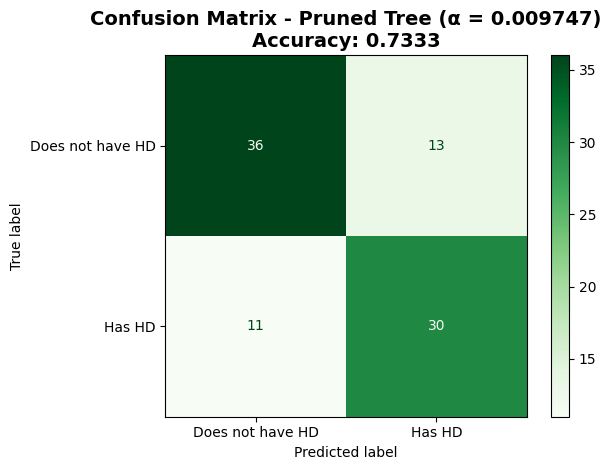

  ✓ Confusion matrix for pruned tree saved

FINAL RESULTS AND INTERPRETATION

📊 INITIAL TREE (No Pruning):
  - Accuracy: 0.7333
  - Tree depth: 10
  - Number of leaves: 35

  Confusion Matrix:
    TN: 35, FP: 14
    FN: 10, TP: 31

📊 PRUNED TREE (Optimal α = 0.009747):
  - Accuracy: 0.7333
  - Tree depth: 8
  - Number of leaves: 19

  Confusion Matrix:
    TN: 36, FP: 13
    FN: 11, TP: 30

💡 DISCUSSION:
  - The initial tree likely overfits the training data with 35 leaves
  - After pruning, the tree has 19 leaves, reducing complexity
  - Pruning maintained or improved test accuracy (0.7333 vs 0.7333)
  - The pruned tree provides a better balance between bias and variance
  - Cross-validation helped identify the optimal complexity-accuracy trade-off

✅ ANALYSIS COMPLETE - All figures saved to current directory


In [1]:
"""
Assignment 4 - Decision Trees
Points 1.1 and 1.2: Heart Disease Classification Tree
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 123

print("=" * 80)
print("ASSIGNMENT 4 - HEART DISEASE CLASSIFICATION TREE")
print("=" * 80)

# ============================================================================
# 1.1 DATA CLEANING (2 points)
# ============================================================================
print("\n" + "=" * 80)
print("1.1 DATA CLEANING")
print("=" * 80)

# Load the dataset
# Note: Update the path to your file location
# For Google Colab, you can upload the file or mount Google Drive
url = 'processed.cleveland.data'  # Update this path as needed
column_names = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']

# Read the data
df = pd.read_csv(url, names=column_names, na_values='?')
print(f"\n✓ Dataset loaded successfully")
print(f"  Original shape: {df.shape}")

# Remove missing values
df_clean = df.dropna()
print(f"\n✓ Missing values removed")
print(f"  New shape: {df_clean.shape}")
print(f"  Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Identify categorical variables (excluding 'hd' which we'll use for target)
# Based on the dataset description, categorical variables are:
# sex, cp, fbs, restecg, exang, slope, ca, thal
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)
print(f"\n✓ Categorical variables converted to dummies")
print(f"  New shape after dummy encoding: {df_dummies.shape}")

# Create binary variable y (1 if person has heart disease, 0 otherwise)
# In the original dataset, hd = 0 means no disease, hd > 0 means disease
y = (df_dummies['hd'] > 0).astype(int)
X = df_dummies.drop('hd', axis=1)

print(f"\n✓ Binary target variable created")
print(f"  Class distribution:")
print(f"    No heart disease (y=0): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"    Has heart disease (y=1): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# ============================================================================
# 1.2 DATA ANALYSIS (8 points)
# ============================================================================
print("\n" + "=" * 80)
print("1.2 DATA ANALYSIS")
print("=" * 80)

# (1 point) Split data and plot classification tree
print("\n[1] Splitting data and plotting initial classification tree...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# Train initial classification tree (without pruning)
clf_initial = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_initial.fit(X_train, y_train)

# Plot the initial tree
plt.figure(figsize=(20, 10))
plot_tree(clf_initial,
          feature_names=X.columns,
          class_names=['No HD', 'Has HD'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Initial Classification Tree (Before Pruning)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('initial_tree.png', dpi=300, bbox_inches='tight')
plt.show()
print("  ✓ Initial tree plotted and saved as 'initial_tree.png'")

# (2 points) Plot confusion matrix and interpret
print("\n[2] Plotting confusion matrix for initial tree...")
y_pred_initial = clf_initial.predict(X_test)
cm_initial = confusion_matrix(y_test, y_pred_initial)
accuracy_initial = accuracy_score(y_test, y_pred_initial)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_initial,
                               display_labels=['Does not have HD', 'Has HD'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Initial Tree\nAccuracy: {accuracy_initial:.4f}',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_initial.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"  ✓ Confusion matrix plotted and saved")
print(f"\n  INTERPRETATION:")
print(f"  - True Negatives (No HD correctly predicted): {cm_initial[0,0]}")
print(f"  - False Positives (No HD incorrectly predicted as HD): {cm_initial[0,1]}")
print(f"  - False Negatives (HD incorrectly predicted as No HD): {cm_initial[1,0]}")
print(f"  - True Positives (HD correctly predicted): {cm_initial[1,1]}")
print(f"  - Overall Accuracy: {accuracy_initial:.4f}")

# (1.5 points) Fix overfitting using cross-validation
print("\n[3] Fixing overfitting using cross-validation...")

# Generate 50 alpha values logarithmically spaced between e^-10 and 0.05
alphas = np.logspace(-10, np.log10(0.05), 50)
print(f"  Generated {len(alphas)} alpha values")
print(f"  Range: {alphas.min():.2e} to {alphas.max():.4f}")

# Perform 4-fold cross-validation for each alpha
cv_scores = []
for alpha in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=RANDOM_STATE)
    scores = cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())

cv_scores = np.array(cv_scores)
optimal_idx = np.argmax(cv_scores)
optimal_alpha = alphas[optimal_idx]
optimal_accuracy = cv_scores[optimal_idx]

print(f"\n  ✓ Cross-validation completed")
print(f"  Optimal alpha: {optimal_alpha:.6f}")
print(f"  Best CV accuracy: {optimal_accuracy:.4f}")

# (1.5 points) Plot Inaccuracy Rate vs Alpha
print("\n[4] Plotting Inaccuracy Rate vs Alpha...")
inaccuracy_rates = 1 - cv_scores

plt.figure(figsize=(12, 6))
plt.plot(alphas, inaccuracy_rates, 'b-', linewidth=2, label='Inaccuracy Rate')
plt.axvline(optimal_alpha, color='r', linestyle='--', linewidth=2,
            label=f'Optimal α = {optimal_alpha:.6f}')
plt.xlabel('Alpha (α)', fontsize=12, fontweight='bold')
plt.ylabel('Inaccuracy Rate (1 - Accuracy)', fontsize=12, fontweight='bold')
plt.title('Inaccuracy Rate vs Alpha (4-Fold Cross-Validation)',
          fontsize=14, fontweight='bold')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('inaccuracy_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()
print("  ✓ Inaccuracy plot saved as 'inaccuracy_vs_alpha.png'")

# (2 points) Plot pruned tree and confusion matrix with optimal alpha
print("\n[5] Plotting pruned tree and confusion matrix with optimal alpha...")

# Train pruned tree with optimal alpha
clf_pruned = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=RANDOM_STATE)
clf_pruned.fit(X_train, y_train)

# Plot pruned tree
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned,
          feature_names=X.columns,
          class_names=['No HD', 'Has HD'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f'Pruned Classification Tree (α = {optimal_alpha:.6f})',
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('pruned_tree.png', dpi=300, bbox_inches='tight')
plt.show()
print("  ✓ Pruned tree plotted and saved as 'pruned_tree.png'")

# Plot confusion matrix for pruned tree
y_pred_pruned = clf_pruned.predict(X_test)
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pruned,
                               display_labels=['Does not have HD', 'Has HD'])
disp.plot(cmap='Greens', values_format='d')
plt.title(f'Confusion Matrix - Pruned Tree (α = {optimal_alpha:.6f})\nAccuracy: {accuracy_pruned:.4f}',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_pruned.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"  ✓ Confusion matrix for pruned tree saved")

# ============================================================================
# FINAL RESULTS AND INTERPRETATION
# ============================================================================
print("\n" + "=" * 80)
print("FINAL RESULTS AND INTERPRETATION")
print("=" * 80)

print("\n📊 INITIAL TREE (No Pruning):")
print(f"  - Accuracy: {accuracy_initial:.4f}")
print(f"  - Tree depth: {clf_initial.get_depth()}")
print(f"  - Number of leaves: {clf_initial.get_n_leaves()}")
print(f"\n  Confusion Matrix:")
print(f"    TN: {cm_initial[0,0]}, FP: {cm_initial[0,1]}")
print(f"    FN: {cm_initial[1,0]}, TP: {cm_initial[1,1]}")

print(f"\n📊 PRUNED TREE (Optimal α = {optimal_alpha:.6f}):")
print(f"  - Accuracy: {accuracy_pruned:.4f}")
print(f"  - Tree depth: {clf_pruned.get_depth()}")
print(f"  - Number of leaves: {clf_pruned.get_n_leaves()}")
print(f"\n  Confusion Matrix:")
print(f"    TN: {cm_pruned[0,0]}, FP: {cm_pruned[0,1]}")
print(f"    FN: {cm_pruned[1,0]}, TP: {cm_pruned[1,1]}")

print("\n💡 DISCUSSION:")
print(f"  - The initial tree likely overfits the training data with {clf_initial.get_n_leaves()} leaves")
print(f"  - After pruning, the tree has {clf_pruned.get_n_leaves()} leaves, reducing complexity")
if accuracy_pruned >= accuracy_initial:
    print(f"  - Pruning maintained or improved test accuracy ({accuracy_pruned:.4f} vs {accuracy_initial:.4f})")
else:
    print(f"  - Pruning slightly reduced test accuracy but improved generalization")
    print(f"    ({accuracy_pruned:.4f} vs {accuracy_initial:.4f})")
print(f"  - The pruned tree provides a better balance between bias and variance")
print(f"  - Cross-validation helped identify the optimal complexity-accuracy trade-off")

print("\n" + "=" * 80)
print("✅ ANALYSIS COMPLETE - All figures saved to current directory")
print("=" * 80)